In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd 'gdrive/MyDrive/Colab Notebooks/PIIA/scikit-learn-tests-marees/'
!ls

/content/gdrive/MyDrive/Colab Notebooks/PIIA/scikit-learn-tests-marees
dataset  PredictionsMarees.ipynb


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [4]:
path = 'dataset/maregraphie_csv_4_1954_1992_date_numbered.csv'
ds = pd.read_csv(path, index_col=0)
ds.head(10)

,num_of_date,Valeur,Source
Date,,,
01/01/1954 00:00:00,1,5.10,4
01/01/1954 01:00:00,2,5.22,4
01/01/1954 02:00:00,3,5.04,4
01/01/1954 03:00:00,4,4.50,4
01/01/1954 04:00:00,5,3.91,4
01/01/1954 05:00:00,6,3.28,4
01/01/1954 06:00:00,7,2.75,4
01/01/1954 07:00:00,8,2.50,4
01/01/1954 08:00:00,9,2.61,4


In [ ]:
ds.iloc[[26298]]

,num_of_date,Valeur,Source
Date,,,
31/12/1956 23:00:00,26299,2.3,4


In [31]:
n = 1000
x = ds['num_of_date']
x = x[:n]
y = ds['Valeur']
y = y[:n]
# x_test_patient = ds['num_of_date_test'][:12]  # data for the official test
# y_test_patient = ds['num_of_patients_test'][:12]

In [32]:
x

Date
01/01/1954 00:00:00       1
01/01/1954 01:00:00       2
01/01/1954 02:00:00       3
01/01/1954 03:00:00       4
01/01/1954 04:00:00       5
                       ... 
11/02/1954 11:00:00     996
11/02/1954 12:00:00     997
11/02/1954 13:00:00     998
11/02/1954 14:00:00     999
11/02/1954 15:00:00    1000
Name: num_of_date, Length: 1000, dtype: int64

##Linear Regression

In [33]:
yy = np.log10(y)

scores = []

In [34]:
yy

Date
01/01/1954 00:00:00    0.707570
01/01/1954 01:00:00    0.717671
01/01/1954 02:00:00    0.702431
01/01/1954 03:00:00    0.653213
01/01/1954 04:00:00    0.592177
                         ...   
11/02/1954 11:00:00    0.726727
11/02/1954 12:00:00    0.678518
11/02/1954 13:00:00    0.612784
11/02/1954 14:00:00    0.544068
11/02/1954 15:00:00    0.468347
Name: Valeur, Length: 1000, dtype: float64

In [9]:
Linear_Regression = LinearRegression()  

In [10]:
print(LinearRegression.__doc__)


    Ordinary least squares Linear Regression.

    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.

    Parameters
    ----------
    fit_intercept : bool, default=True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).

    normalize : bool, default=False
        This parameter is ignored when ``fit_intercept`` is set to False.
        If True, the regressors X will be normalized before regression by
        subtracting the mean and dividing by the l2-norm.
        If you wish to standardize, please use
        :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
        on an estimator with ``normalize=False``.

        .. deprecated:: 1.0
           `normalize` was deprecate

In [11]:
print(KFold.__doc__[:1070])
cv = KFold(n_splits=10, random_state=1, shuffle=True)  # helps to separate the dataset in training and testing
separated = cv.split(x)
sets = next(separated)
#print(next(separated))
#print(next(separated))
#print(next(separated))
#print(next(separated))
# we can do this 10 times

K-Folds cross-validator

    Provides train/test indices to split data in train/test sets. Split
    dataset into k consecutive folds (without shuffling by default).

    Each fold is then used once as a validation while the k - 1 remaining
    folds form the training set.

    Read more in the :ref:`User Guide <k_fold>`.

    Parameters
    ----------
    n_splits : int, default=5
        Number of folds. Must be at least 2.

        .. versionchanged:: 0.22
            ``n_splits`` default value changed from 3 to 5.

    shuffle : bool, default=False
        Whether to shuffle the data before splitting into batches.
        Note that the samples within each split will not be shuffled.

    random_state : int, RandomState instance or None, default=None
        When `shuffle` is True, `random_state` affects the ordering of the
        indices, which controls the randomness of each fold. Otherwise, this
        parameter has no effect.
        Pass an int for reproducible output across 

In [12]:
print(len(sets[0]))
print(len(sets[1]))
print("total : ", len(sets[0]) + len(sets[1]))

90
10
total :  100


In [13]:
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test , yy_train, yy_test= x[train_index], x[test_index], y[train_index], y[test_index], yy[train_index], yy[test_index]
    Linear_Regression.fit(X_train.values.reshape(-1,1), yy_train)
    scores.append(Linear_Regression.score(X_test.values.reshape(-1,1), yy_test))

In [14]:
print("Average score for Linear Regression:", sum(scores) / len(scores) * 100, "%") 

Average score for Linear Regression: -23.16838813563928 %


This model won't work

<br>

#SVR : Support Vector Regression

In [28]:
scores_1 = []
scores_2 = []
scores_3 = []
scores_4 = []
scores_5 = []

In [29]:
print(SVR.__doc__)

Epsilon-Support Vector Regression.

    The free parameters in the model are C and epsilon.

    The implementation is based on libsvm. The fit time complexity
    is more than quadratic with the number of samples which makes it hard
    to scale to datasets with more than a couple of 10000 samples. For large
    datasets consider using :class:`~sklearn.svm.LinearSVR` or
    :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
    :class:`~sklearn.kernel_approximation.Nystroem` transformer.

    Read more in the :ref:`User Guide <svm_regression>`.

    Parameters
    ----------
    kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'
         Specifies the kernel type to be used in the algorithm.
         If none is given, 'rbf' will be used. If a callable is given it is
         used to precompute the kernel matrix.

    degree : int, default=3
        Degree of the polynomial kernel function ('poly').
        Ignored by all

In [30]:
SVR_Regressor_1 = SVR(kernel='rbf')
SVR_Regressor_2 = SVR(kernel='poly', degree=5)
SVR_Regressor_3 = SVR(kernel='linear')
SVR_Regressor_4 = SVR(kernel='poly', degree=2)
SVR_Regressor_5 = SVR(kernel='poly', degree=7)

In [18]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [19]:
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test, yy_train, yy_test = x[train_index], x[test_index], y[train_index], y[test_index], yy[train_index], yy[test_index]
    #
    SVR_Regressor_1.fit(X_train.values.reshape(-1, 1), y_train)
    scores_1.append(SVR_Regressor_1.score(X_test.values.reshape(-1, 1), y_test))
    #
    SVR_Regressor_2.fit(X_train.values.reshape(-1, 1), y_train)
    scores_2.append(SVR_Regressor_2.score(X_test.values.reshape(-1, 1), y_test))
    #
    SVR_Regressor_3.fit(X_train.values.reshape(-1, 1), y_train)
    scores_3.append(SVR_Regressor_3.score(X_test.values.reshape(-1, 1), y_test))
    #
    SVR_Regressor_4.fit(X_train.values.reshape(-1, 1), y_train)
    scores_4.append(SVR_Regressor_4.score(X_test.values.reshape(-1, 1), y_test))
    #
    SVR_Regressor_5.fit(X_train.values.reshape(-1, 1), y_train)
    scores_5.append(SVR_Regressor_5.score(X_test.values.reshape(-1, 1), y_test))


In [20]:
print("Average score for SVR_Regressor_1:", sum(scores_1) / 10,
      "\nAverage score for SVR_Regressor_2:", sum(scores_2) / 10,
      "\nAverage score for SVR_Regressor_3:", sum(scores_3) / 10,
      "\nAverage score for SVR_Regressor_4:", sum(scores_4) / 10,
      "\nAverage score for SVR_Regressor_5:", sum(scores_5) / 10)  

Average score for SVR_Regressor_1: -0.346715971712921 
Average score for SVR_Regressor_2: -0.31952946807117 
Average score for SVR_Regressor_3: -0.2479729294506579 
Average score for SVR_Regressor_4: -0.2419184842602334 
Average score for SVR_Regressor_5: -0.4820051374440661


For this case, the SVR kernel is poly with degree 5. 

###Evaluation

In [ ]:
SVR_Regressor_2.fit(x.values.reshape(-1, 1), y)  # train with x and y values

SVR(degree=5, kernel='poly')

In [ ]:
y_test_patient

Date
2020-01-21        11.0
2020-01-22        13.0
2020-01-23        15.0
2020-01-24        58.0
2020-01-25       118.0
2020-01-26       217.0
2020-01-27      1663.0
2020-01-28     43847.0
2020-01-29    161807.0
2020-01-30    312237.0
2020-01-31    460252.0
2020-02-01    657996.0
Name: num_of_patients_test, dtype: float64

In [ ]:
y_test_patient_log = np.log10(y_test_patient)

In [ ]:
y_test_patient_log

Date
2020-01-21    1.041393
2020-01-22    1.113943
2020-01-23    1.176091
2020-01-24    1.763428
2020-01-25    2.071882
2020-01-26    2.336460
2020-01-27    3.220892
2020-01-28    4.641940
2020-01-29    5.208997
2020-01-30    5.494484
2020-01-31    5.662996
2020-02-01    5.818223
Name: num_of_patients_test, dtype: float64

In [ ]:
evaluation_2 = SVR_Regressor_2.predict(x_test_patient.values.reshape(-1, 1))

In [ ]:
score = SVR_Regressor_2.score(x_test_patient.values.reshape(-1, 1), y_test_patient)
print("Final Evaluation Score for SVR Regression :", score)

Final Evaluation Score for SVR Regression : 0.9587420012661088


It's better than linear regression

###Prediction for new days

In [ ]:
# the last datetime is 95, so :
x_prediction = [[95],[96],[97],[98],[99],[100],[101]]  # matrix like a vector

In [ ]:
print('Evaluation for expecting 6 days in future in SVR_Regression:')
for predict in x_prediction:
  print('day', predict, '=', int(SVR_Regressor_2.predict([predict])))

Evaluation for expecting 6 days in future in SVR_Regression:
day [95] = 834622
day [96] = 879540
day [97] = 926369
day [98] = 975169
day [99] = 1026003
day [100] = 1078932
day [101] = 1134022


###Plot

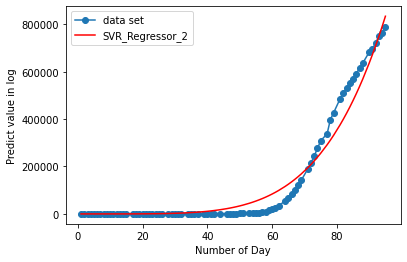

In [ ]:
predicted2 = (SVR_Regressor_2.predict(x.values.reshape(-1, 1)))
predicted22 = np.log10(predicted2[23:])
plt.plot(x, y, 'o-', label='data set')
plt.plot(x, predicted2, c='#ff0000', label='SVR_Regressor_2')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in log')
plt.show()

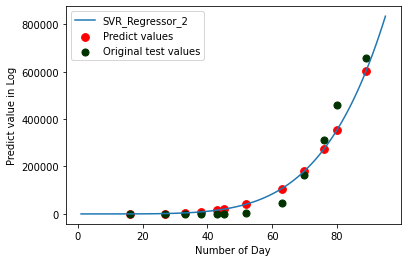

In [ ]:
plt.plot(x, predicted2,label='SVR_Regressor_2')
plt.scatter(x_test_patient, evaluation_2, s=60, c='#ff0000', label='Predict values')
plt.scatter(x_test_patient, y_test_patient ,s=50, c='#003300', label='Original test values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()

#MLPRegressor : Multi-layer Perceptron regressor

In [21]:
print(MLPRegressor.__doc__)

Multi-layer Perceptron regressor.

    This model optimizes the squared error using LBFGS or stochastic gradient
    descent.

    .. versionadded:: 0.18

    Parameters
    ----------
    hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
        The ith element represents the number of neurons in the ith
        hidden layer.

    activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
        Activation function for the hidden layer.

        - 'identity', no-op activation, useful to implement linear bottleneck,
          returns f(x) = x

        - 'logistic', the logistic sigmoid function,
          returns f(x) = 1 / (1 + exp(-x)).

        - 'tanh', the hyperbolic tan function,
          returns f(x) = tanh(x).

        - 'relu', the rectified linear unit function,
          returns f(x) = max(0, x)

    solver : {'lbfgs', 'sgd', 'adam'}, default='adam'
        The solver for weight optimization.

        - 'lbfgs' is an optimizer in the family of qu

In [35]:
scores_1 = []
scores_2 = []
scores_3 = []
scores_4 = []
scores_5 = []

In [36]:
MLP_Regressor_1 = MLPRegressor(hidden_layer_sizes=(4), activation='tanh', solver='lbfgs', learning_rate_init=0.01, max_iter=1000, random_state=120, validation_fraction=0.1)
MLP_Regressor_2 = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='lbfgs', learning_rate_init=0.01, max_iter=1000, random_state=120, validation_fraction=0.1)
MLP_Regressor_3 = MLPRegressor(hidden_layer_sizes=(1), activation='tanh', solver='lbfgs', learning_rate_init=0.3, max_iter=1000, random_state=120, validation_fraction=0.2)
MLP_Regressor_4 = MLPRegressor(hidden_layer_sizes=(5), activation='relu', solver='lbfgs', learning_rate_init=0.01, max_iter=1000, random_state=1, validation_fraction=0.1)
MLP_Regressor_5 = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='sgd', learning_rate_init=0.01, max_iter=1000, random_state=1, validation_fraction=0.1)

In [37]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [38]:
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test, yy_train, yy_test = x[train_index], x[test_index], y[train_index], y[test_index], yy[train_index], yy[test_index]
    #
    MLP_Regressor_1.fit(X_train.values.reshape(-1,1), yy_train)  # train with y logarithmic
    scores_1.append(MLP_Regressor_1.score(X_test.values.reshape(-1,1), yy_test))  # test with y logarithmic
    #
    MLP_Regressor_2.fit(X_train.values.reshape(-1,1), yy_train)
    scores_2.append(MLP_Regressor_2.score(X_test.values.reshape(-1,1), yy_test))
    #
    MLP_Regressor_3.fit(X_train.values.reshape(-1,1), yy_train)
    scores_3.append(MLP_Regressor_3.score(X_test.values.reshape(-1,1), yy_test))
     #
    MLP_Regressor_4.fit(X_train.values.reshape(-1,1), yy_train)
    scores_4.append(MLP_Regressor_4.score(X_test.values.reshape(-1,1), yy_test))
    #
    MLP_Regressor_5.fit(X_train.values.reshape(-1,1), yy_train)
    scores_5.append(MLP_Regressor_5.score(X_test.values.reshape(-1,1), yy_test))

In [39]:
print("Average score for MLP_Regressor_1:", sum(scores_1)/10,
      "\nAverage score for MLP_Regressor_2:", sum(scores_2)/10,
      "\nAverage score for MLP_Regressor_3:", sum(scores_3)/10, 
      "\nAverage score for MLP_Regressor_4:",sum(scores_4)/10,
      "\nAverage score for MLP_Regressor_5:",sum(scores_5)/10)    

Average score for MLP_Regressor_1: -0.017869323430975713 
Average score for MLP_Regressor_2: -0.01764328033751933 
Average score for MLP_Regressor_3: -0.019322681158746337 
Average score for MLP_Regressor_4: -0.016418813462456792 
Average score for MLP_Regressor_5: -0.016185669616204646


For MLPRegressor the best option is MLP_Regressor_2.

#Evaluation

In [ ]:
MLP_Regressor = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='lbfgs', learning_rate_init=0.01, max_iter=1000, random_state=120, validation_fraction=0.1)

In [ ]:
MLP_Regressor.fit(x.values.reshape(-1, 1), yy)

MLPRegressor(activation='tanh', hidden_layer_sizes=5, learning_rate_init=0.01,
             max_iter=1000, random_state=120, solver='lbfgs')

In [ ]:
y_test_patient_log = np.log10(y_test_patient)

In [ ]:
evaluation_3 = MLP_Regressor.predict(x_test_patient.values.reshape(-1,1))

In [ ]:
score = MLP_Regressor.score(x_test_patient.values.reshape(-1, 1), y_test_patient_log)   
print("Final Evaluation Score for MLP_Regressor :", score)

Final Evaluation Score for MLP_Regressor : 0.9984346234582061


###Prediction for new days

In [ ]:
# the last datetime is 95, so :
x_prediction = [[95],[96],[97],[98],[99],[100],[101]]  # matrix like a vector

In [ ]:
print('Evaluation for expecting 6 days in future in MLP_Regressor:')
for predict in x_prediction:
  print('day', predict, '=', int(10 ** MLP_Regressor.predict([predict])))

Evaluation for expecting 6 days in future in MLP_Regressor:
day [95] = 781790
day [96] = 801797
day [97] = 822086
day [98] = 842747
day [99] = 863865
day [100] = 885524
day [101] = 907799


###Plot

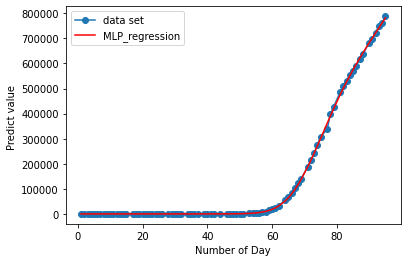

In [ ]:
predicted3 = 10 ** MLP_Regressor.predict(x.values.reshape(-1,1))
predicted33 = MLP_Regressor.predict(x.values.reshape(-1,1))
plt.plot(x, y, 'o-',label='data set')
plt.plot(x, predicted3, c='#ff0000', label='MLP_regression')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value ')
plt.show()

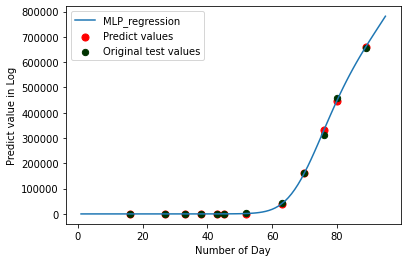

In [ ]:
plt.plot(x, predicted3,label='MLP_regression')
plt.scatter(x_test_patient, 10 ** evaluation_3, s=50, c='#ff0000', label='Predict values')
plt.scatter(x_test_patient, y_test_patient, s=40, c='#003300', label='Original test values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()

#Conclusion

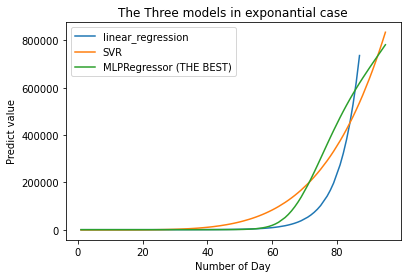

In [ ]:
plt.title("The Three models in exponantial case")
plt.plot(x[:76], 10 ** predicted1[:76], label='linear_regression')
plt.plot(x, predicted2, label='SVR')
plt.plot(x, predicted3, label='MLPRegressor (THE BEST)')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()

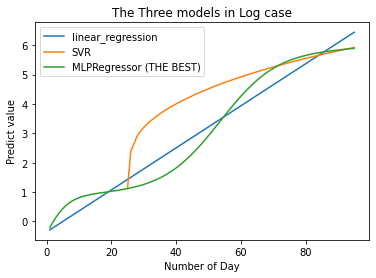

In [ ]:
plt.title("The Three models in Log case")
plt.plot(x, predicted1, label='linear_regression')
plt.plot(x[23:], predicted22, label='SVR')
plt.plot(x, predicted33, label='MLPRegressor (THE BEST)')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()

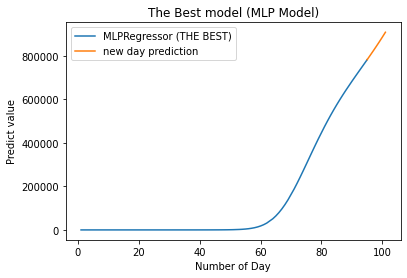

In [ ]:
plt.title("The Best model (MLP Model)")
plt.plot(x, predicted3, label='MLPRegressor (THE BEST)')
plt.plot(x_prediction, 10 ** MLP_Regressor.predict(x_prediction), label='new day prediction')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()

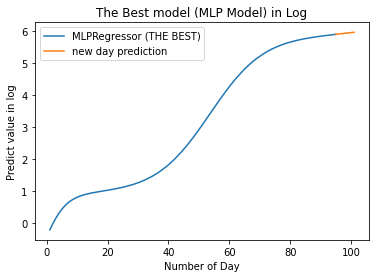

In [ ]:
plt.title("The Best model (MLP Model) in Log")
plt.plot(x, np.log10(predicted3),label='MLPRegressor (THE BEST)')
plt.plot(x_prediction, MLP_Regressor.predict(x_prediction), label='new day prediction')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in log')
plt.show()

#Data set Marées

In [ ]:
lines_one_file = 365337 - 15

In [ ]:
files_quantity = 166

In [ ]:
lines_total_aprox = files_quantity * lines_one_file

In [ ]:
lines_total_aprox

60643452

In [ ]:
a = np.array([0 for _ in range(lines_total_aprox)])

In [ ]:
len(a)

60643452